## CS253 Python Assignment
##### Aniket Suhas Borkar,  Roll no. 210135

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import the necessary libraries

In [2]:
data = pd.read_csv('kag_risk_factors_cervical_cancer.csv')
data.head()

# import the dataset into a pandas dataframe

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [3]:
data = data.drop_duplicates()

# drop any rows which might be duplicates

In [4]:
for column in data.columns:
    if(type(data[column][0]) != np.int64 or type(data[column][0]) != np.float64):
        data[column] = pd.to_numeric(data[column], errors='coerce')

data.info()
# Convert all '?' values into NaN, and all numeric values to np.float64 or np.int64 as appropriate

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           810 non-null    float64
 2   First sexual intercourse            828 non-null    float64
 3   Num of pregnancies                  779 non-null    float64
 4   Smokes                              822 non-null    float64
 5   Smokes (years)                      822 non-null    float64
 6   Smokes (packs/year)                 822 non-null    float64
 7   Hormonal Contraceptives             732 non-null    float64
 8   Hormonal Contraceptives (years)     732 non-null    float64
 9   IUD                                 723 non-null    float64
 10  IUD (years)                         723 non-null    float64
 11  STDs                                735 non-n

In [5]:
data.head()

# View the data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [6]:
for column in data.columns:
    data[column] = data[column].fillna(data[column].median())

# Handle NaN values by replacing them with the median values of the corresponding row

In [7]:
data.info()

# View the info, from which we see that all the null values have been handled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 835 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 835 non-null    int64  
 1   Number of sexual partners           835 non-null    float64
 2   First sexual intercourse            835 non-null    float64
 3   Num of pregnancies                  835 non-null    float64
 4   Smokes                              835 non-null    float64
 5   Smokes (years)                      835 non-null    float64
 6   Smokes (packs/year)                 835 non-null    float64
 7   Hormonal Contraceptives             835 non-null    float64
 8   Hormonal Contraceptives (years)     835 non-null    float64
 9   IUD                                 835 non-null    float64
 10  IUD (years)                         835 non-null    float64
 11  STDs                                835 non-n

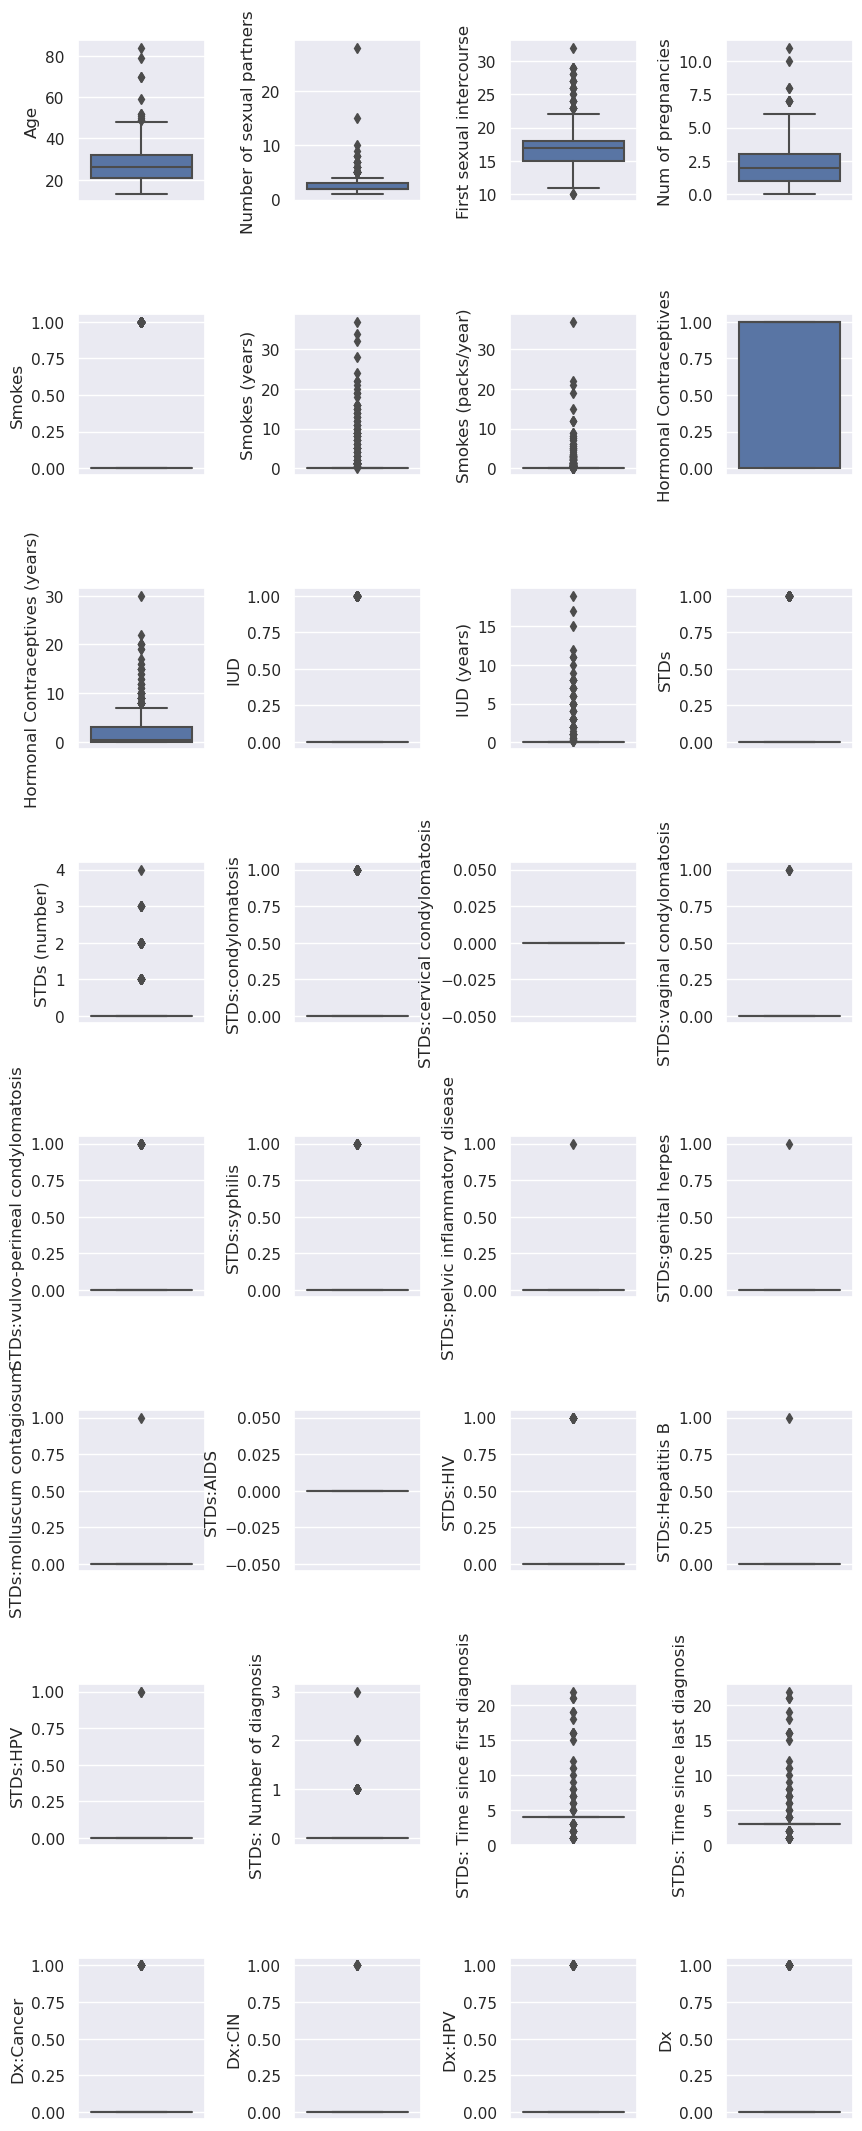

In [8]:
sns.set(rc={'figure.figsize':(10,27)})
fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.7)

i = 1
for column in data.columns:
    ax = fig.add_subplot(8, 4, i)
    sns.boxplot(data=data, y = column, ax = ax)
    i+=1
    if(i > 32):
        break

plt.show()

# Visualise the raw data to get a sense of the distribution of the values

We note that since most of the features are binary (whether STD is present or not), they cannot be used to check for outliers.
Outliers can be detected only in terms of number of sexual partners, first intercourse and number of pregnancies, where there is a meaningful dirstribution of values and outliers can be identified.

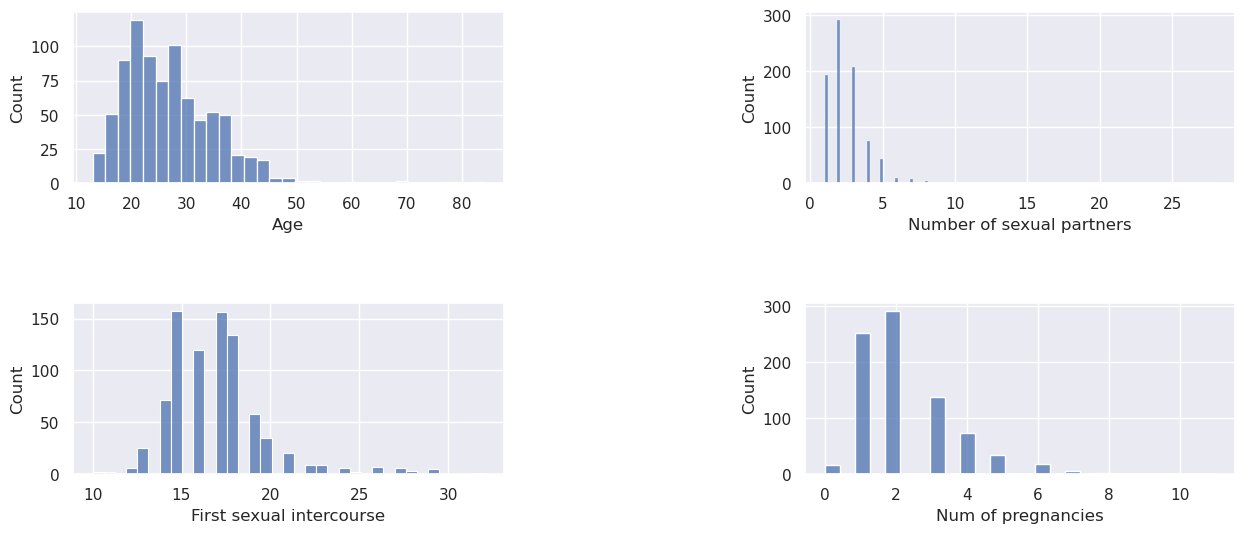

In [9]:
sns.set(rc={'figure.figsize':(15,6)})
fig2 = plt.figure()
fig2.subplots_adjust(hspace=0.7, wspace=0.7)

i = 1
for column in data.columns:
    ax = fig2.add_subplot(2, 2, i)
    sns.histplot(data=data, x = column, ax = ax)
    i+=1
    if(i == 5):
        break

plt.show()

# As seen from the above observation, we plot those features in which it is meaningful to remove outliers

We can drop the outliers which lie outside 1.5*(interquartile range) on either side of the 25th and 75th percentile.

In [10]:
i = 0
outlier_limits = []
for column in data.columns:
    percentile25 = data[column].quantile(0.25)
    percentile75 = data[column].quantile(0.75)
    iqr = percentile75 - percentile25
    # Get the differnce between the 75th and 25th percentile
    # i.e. the interquartile range
    lower_limit = percentile25 - 1.5*iqr
    upper_limit = percentile75 + 1.5*iqr
    # Set the upperlimit and lower limit above and below which we consider data to be an outlier
    i+=1
    outlier_limits.append(tuple([lower_limit, upper_limit]))
    if(i == 4):
        break
        # since we have decided to choose outliers only from the first 4 features (which have a meaningful distribution) 

for i in range(4):
    data = data[data[data.columns[i]] < outlier_limits[i][1]]
    data = data[data[data.columns[i]] > outlier_limits[i][0]]
    # Drop all those rows in which the data lies outside the limits


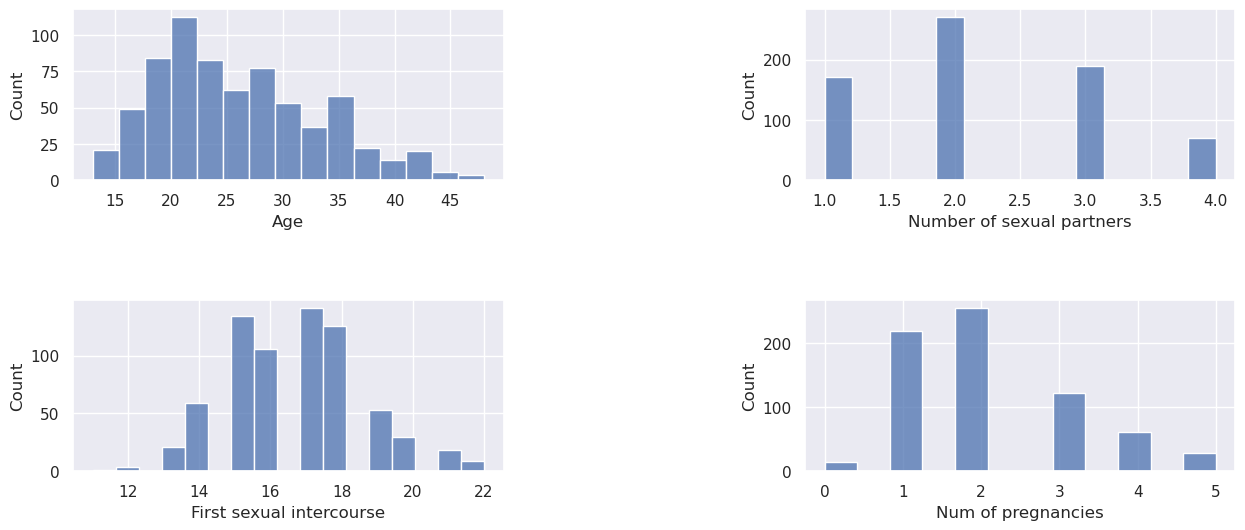

In [11]:
sns.set(rc={'figure.figsize':(15,6)})
fig3 = plt.figure()
fig3.subplots_adjust(hspace=0.7, wspace=0.7)

i = 1
for column in data.columns:
    ax = fig3.add_subplot(2, 2, i)
    sns.histplot(data=data, x = column, ax = ax)
    i+=1
    if(i == 5):
        break
        # We plot only the first 4 features

plt.show()

# Plot the features' distribution after dropping the outliers

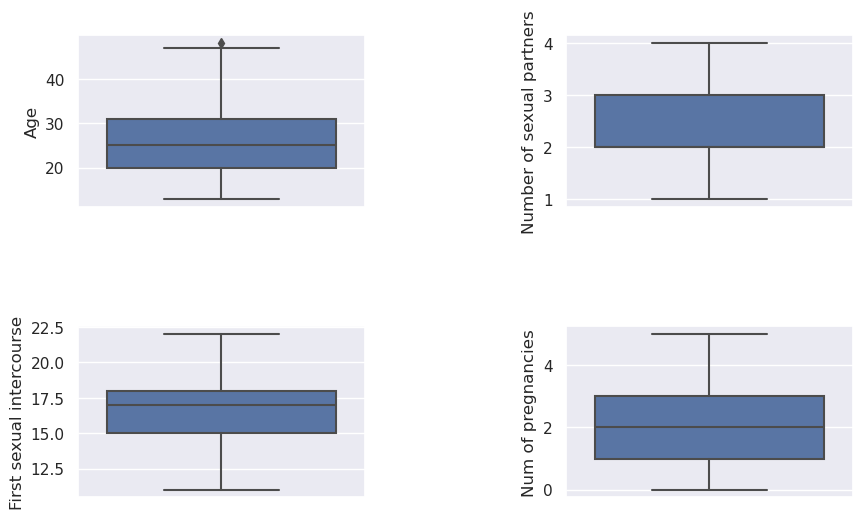

In [12]:
sns.set(rc={'figure.figsize':(10,6)})
fig4 = plt.figure()
fig4.subplots_adjust(hspace=0.7, wspace=0.7)

i = 1
for column in data.columns:
    ax = fig4.add_subplot(2, 2, i)
    sns.boxplot(data=data, y = column, ax = ax)
    i+=1
    if(i == 5):
        break

plt.show()

Thus the outliers have been removed successfully.
In order to further normalize the data we can use min-max scaling normalisation for the features.

In [13]:
for column in data.columns:
    diff = data[column].max() - data[column].min()
    if(diff != 0):
        # in order to avoid NaN which can be generated in case diff == 0 (i.e. min = max case)
        # It indeed does happen in one of the features, where min = max = 0
        data[column] = (data[column] - data[column].min()).div(diff)


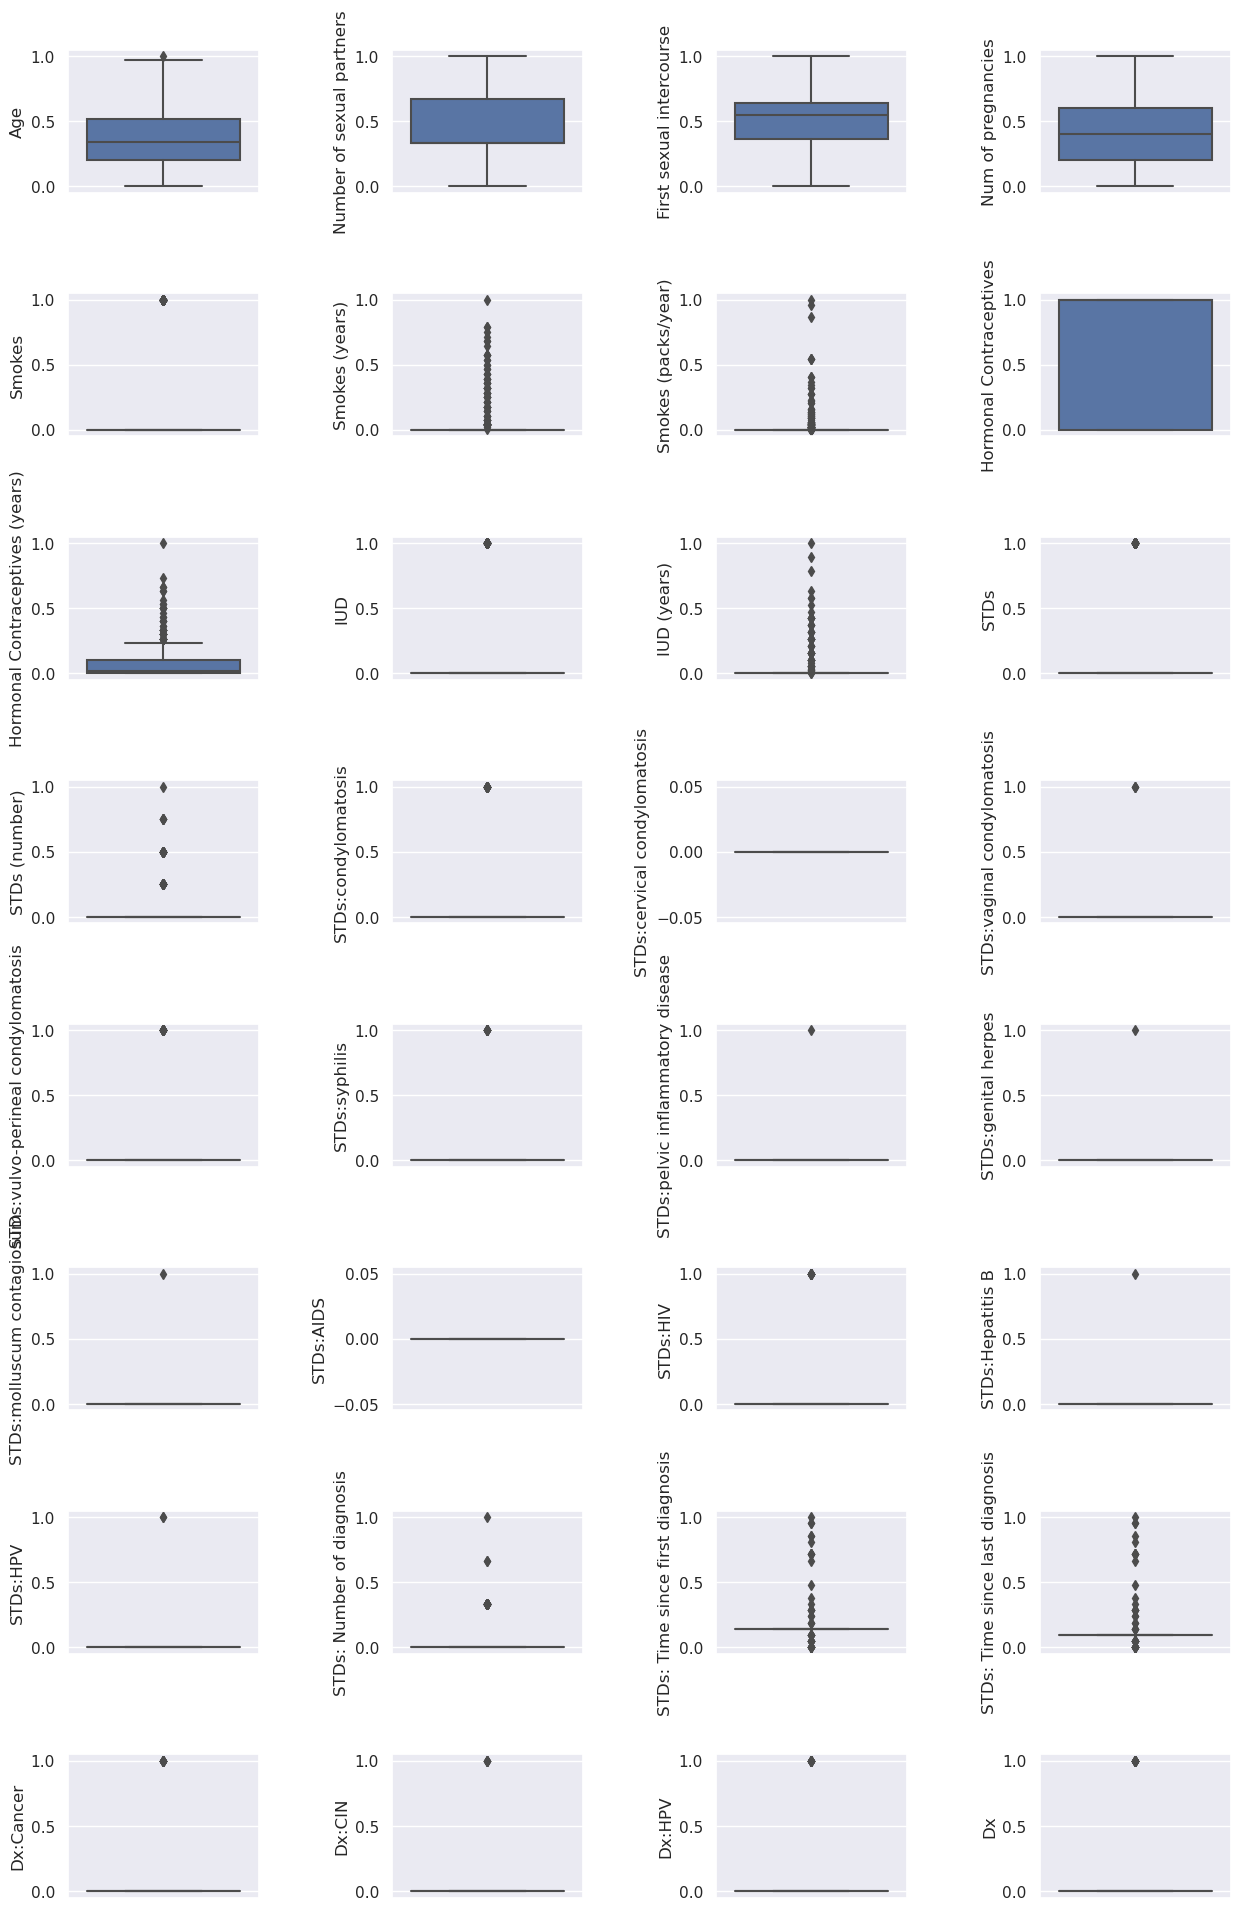

In [14]:
sns.set(rc={'figure.figsize':(15,24)})
fig5 = plt.figure()
fig5.subplots_adjust(hspace=0.7, wspace=0.7)

i = 1
for column in data.columns:
    ax = fig5.add_subplot(8, 4, i)
    sns.boxplot(data=data, y = column, ax = ax)
    i+=1
    if(i > 32):
        break

plt.show()

# Visualise the normalised features using boxplot
# We note that now all the features have values ranging between 0 and 1. In the features which had a meaningful distribution
# and where outliers could have affected model performance, the outliers have been removed.

# These features are - Age , Number of Sexual Partners, First Sexual Intercourse and Number of Pregnancies.

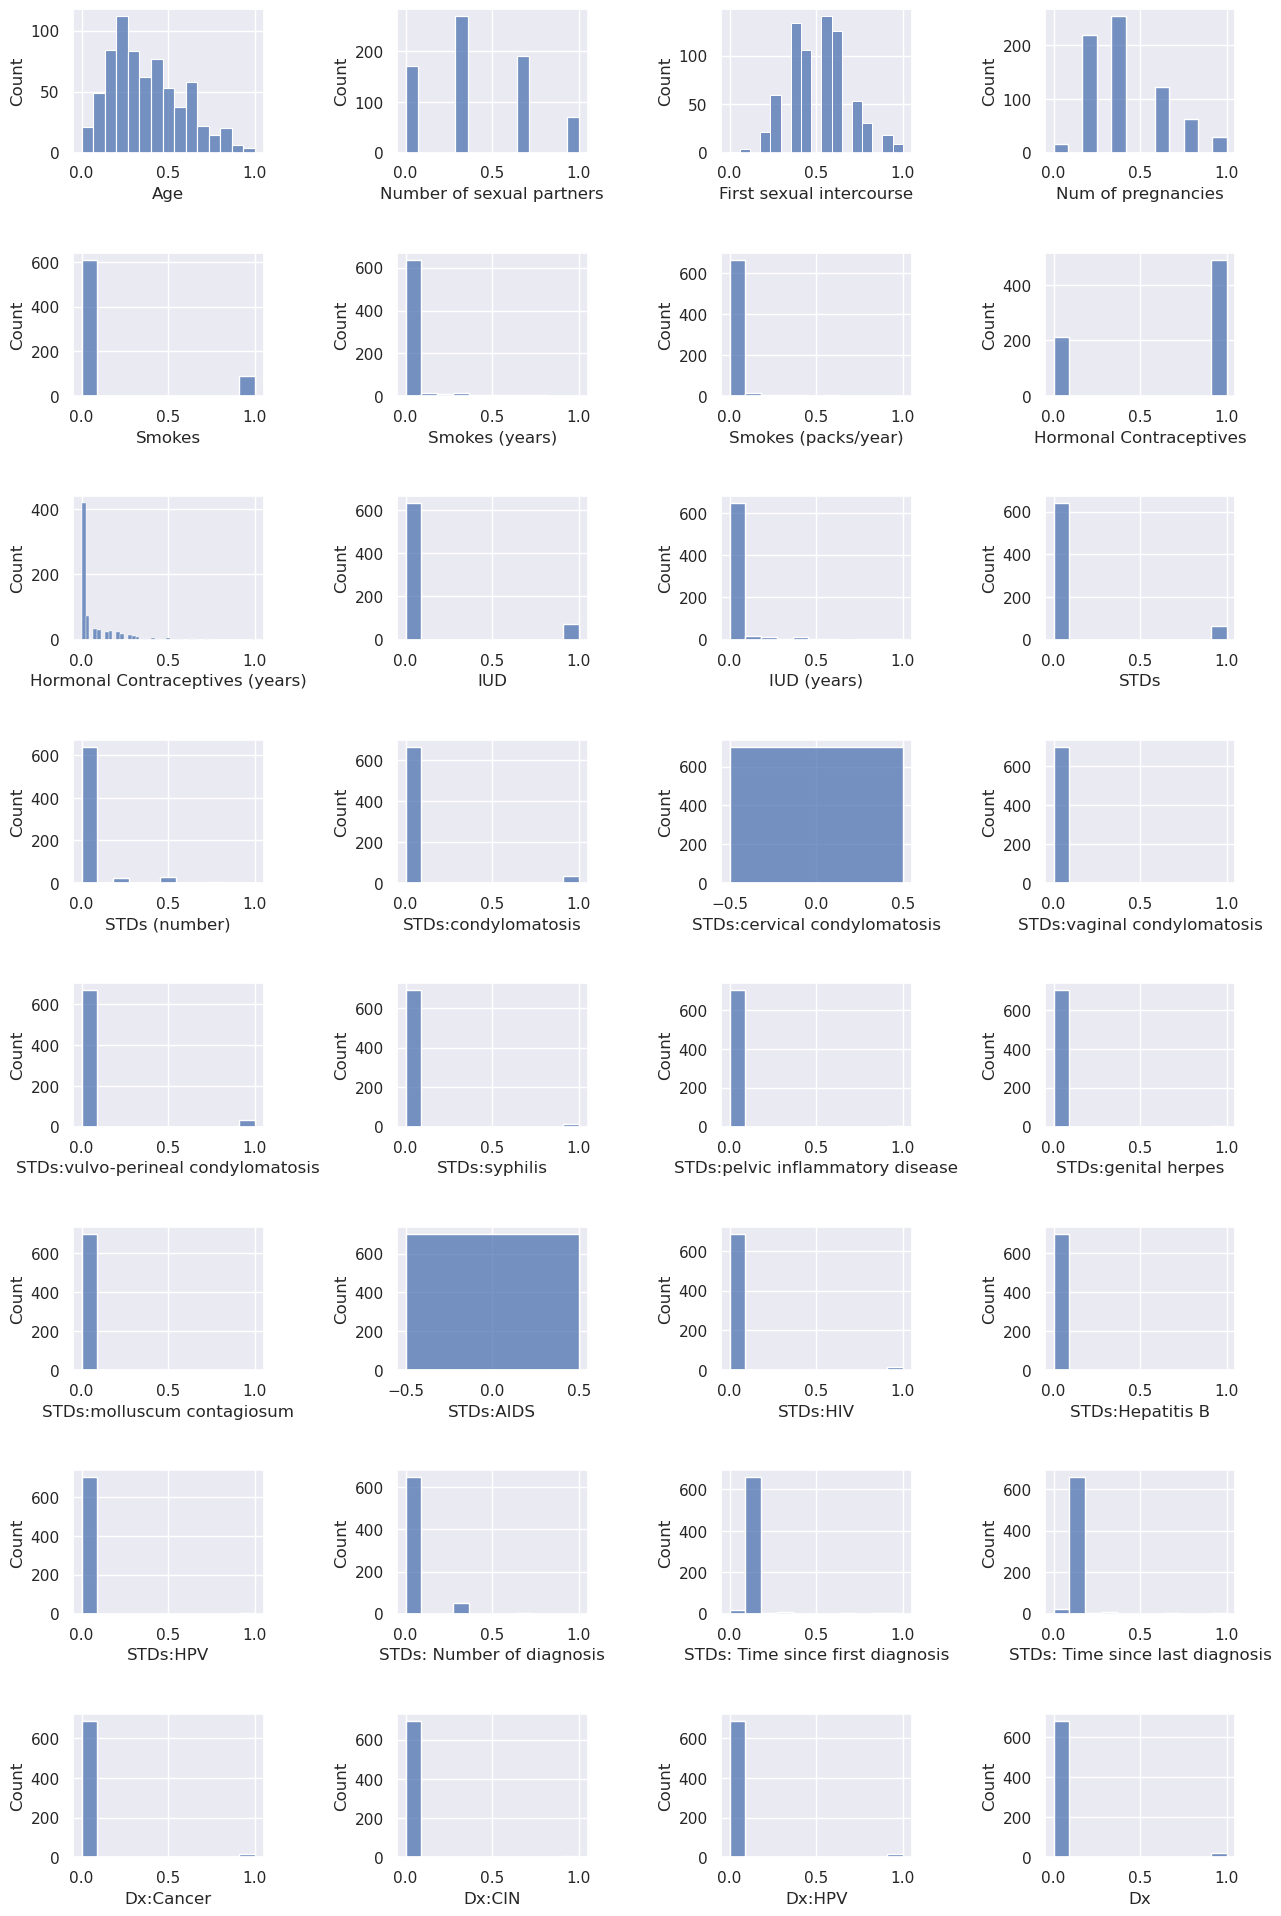

In [15]:
sns.set(rc={'figure.figsize':(15,24)})
fig6 = plt.figure()
fig6.subplots_adjust(hspace=0.7, wspace=0.7)

i = 1
for column in data.columns:
    ax = fig6.add_subplot(8, 4, i)
    sns.histplot(data=data, x = column, ax = ax)
    i+=1
    if(i > 32):
        break

plt.show()

# Visualise the normalised features using histograms

<AxesSubplot:>

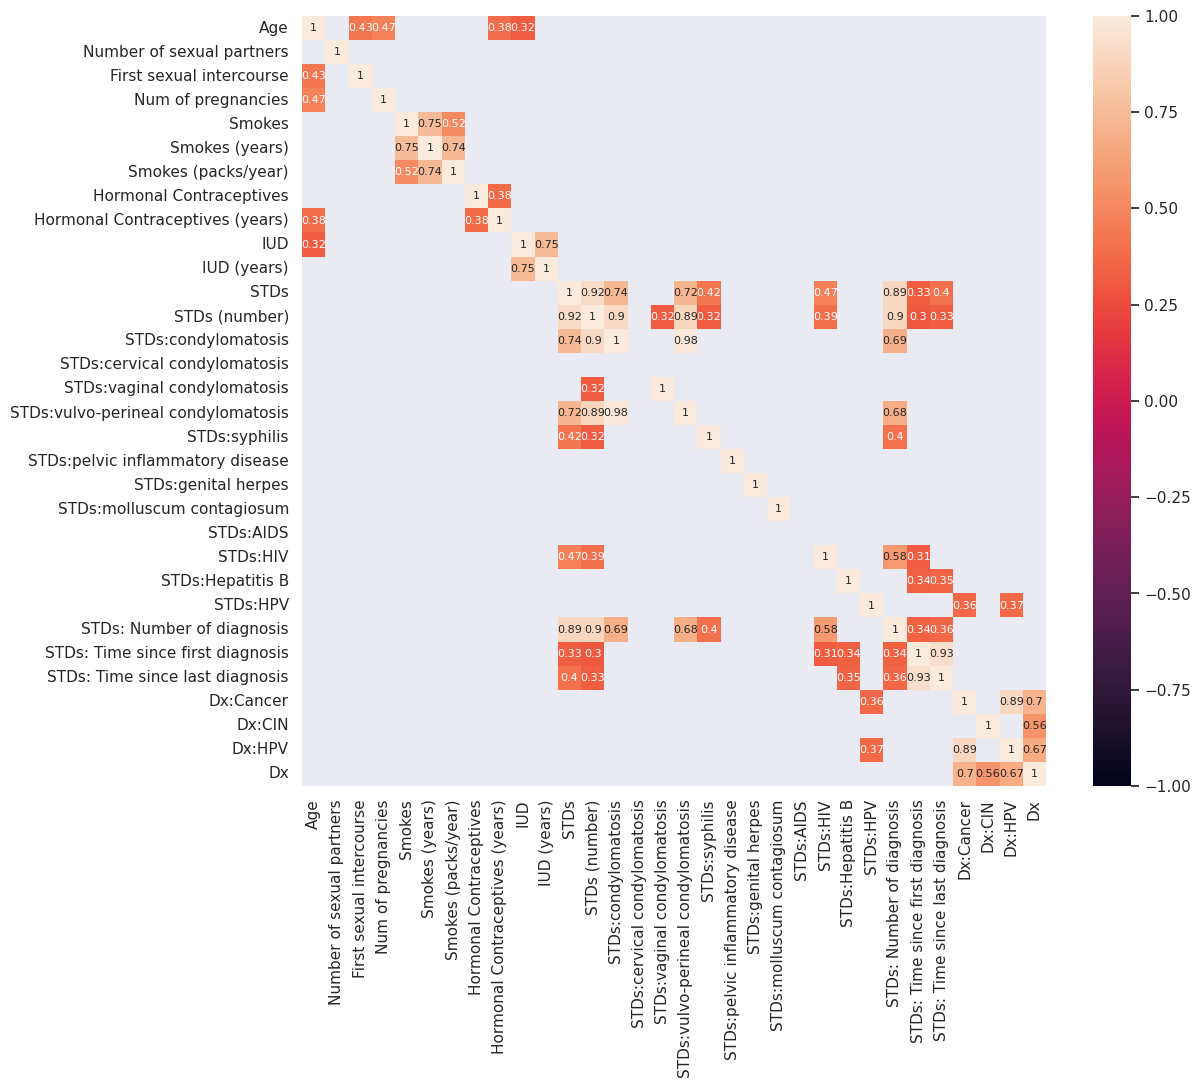

In [16]:
corr = data.iloc[:, :32].corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.3) | (corr <= -0.3)], annot=True, annot_kws={"size": 8}, vmax=1.0, vmin=-1.0)

# Create a heatmap to view correlation between various different features

In [17]:
def X_Y_split(data, target):
    # This is a helper function for splitting the raw data into X and Y, i.e. the input features and target variables.
    # It takes as input the data frame containing raw data and outputs the X and Y, where Y is a dataframe containing the
    # single column with the values of the given target variable, and X is a dataframe with input features corresponding to
    # each sample

    Xdata_columns = ['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'STDs: Time since first diagnosis', 'STDs: Time since last diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx']
    data = data.reset_index(drop = True)
    # reset the index in case it might be shuffled before
    Ydata = pd.DataFrame([data[target],]).transpose()
    # create the Y_data
    i = 0
    if(np.issubdtype(type(Ydata[target][0]), np.number) == False):
        for a in Ydata[target]:
            Ydata[target][i] = Ydata[target][i][0]
            i += 1
            # if data is a list of numbers, i.e. '[0]' instead of '0', extract the underlying number
        Ydata[target] = pd.to_numeric(Ydata[target])
        # In case the data is not numeric type, cast it accordingly
    else:
        pass
    Xdata = pd.DataFrame(data, columns=Xdata_columns, dtype=np.float64)
    return tuple([Xdata, Ydata])

In [18]:

def calc_accuracy(y_pred, y_true):
    # function to calculate accuracy of the classifier.
    # accuracy = no. of correct predictions/total predictions
    count = 0
    acc = 0.0
    for i in range(y_pred.shape[0]):
        if(y_pred[i] == y_true[i]):
            count += 1
    acc = count/y_pred.shape[0]
    return acc

In [19]:
def prepare_data(target, data, split_ratio = 0.3, oversample=True):
    
    from sklearn.model_selection import train_test_split
    # Import and use the train_test_split

    data_X, data_Y_target = X_Y_split(data, target)
    # first split the data into X and Y, depending on the chosen target variable

    (train_X, test_X, train_Y, test_Y) = train_test_split(data_X, data_Y_target, test_size=split_ratio, stratify=data_Y_target)
    # split the data into test and train, while using the target variable data as arg to stratify.
    # This ensures that the test and train sets have a similar distribution of samples from different classes present in 
    # data_Y_target

    data_X = train_X
    data_Y_target = train_Y

    if(oversample == True):
        # if the oversample is set to True, we use SMOTE to oversample the data.
        from imblearn.over_sampling import SMOTE

        sm = SMOTE(random_state = 42, sampling_strategy='minority')
        # we resample the minority class using SMOTE, which generates artificial samples for the minority class

        data_X_oversampled, data_Y_oversampled = sm.fit_resample(data_X, data_Y_target)

        data_X_oversampled = pd.DataFrame(data_X_oversampled, columns=data_X.columns, dtype=np.float64)
        data_Y_oversampled = pd.DataFrame(data_Y_oversampled, columns=data_Y_target.columns, dtype=np.int64)
        # cast the oversampled data into dataframes

        data_X = data_X_oversampled
        data_Y_target = data_Y_oversampled

    else:
        pass

    train_X = data_X
    train_Y = data_Y_target

    return tuple([train_X, train_Y, test_X, test_Y])

def PCA_on_data(train_X, test_X, pca_components = 0.98):
    # this function uses the PCA function in sklearn to extract the principal components from the data.
    # by default we extract enough features to explain 98% of the variance
    from sklearn.decomposition import PCA

    pca = PCA(n_components = pca_components)

    train_X = pd.DataFrame(pca.fit_transform(train_X))
    test_X = pd.DataFrame(pca.transform(test_X))  
     
    return tuple([train_X, test_X])


In [20]:
class Classifier:
    # This is the class which is used to store the classifier, its hyperparameters and define various methods
    # which need to be called to train the model.

    def __init__(self, type_model, target_in):
        self.target = target_in
        # set the target which this classifier is trained for

        if(type_model == 'KNN'):
            self.type_model = type_model
        elif(type_model == 'SVM'):
            self.type_model = type_model
        else:
            raise Exception('Invalid model')
            # we are only using SVM and KNN models so we accept only those as input

    def prepare_model(self, hyperpara = -1):
        # set the hyperparameter if provided, else set the default
        if(hyperpara == -1):
            if(self.type_model == 'SVM'):
                self.C = 200
            else:
                self.C = 3
        else:
            self.C = hyperpara
            
        # initialise the model by importing appropriately from sklearn
        if(self.type_model == 'KNN'):
            from sklearn.neighbors import KNeighborsClassifier
            self.model = KNeighborsClassifier(n_neighbors = self.C)
        else:
            from sklearn.svm import SVC
            self.model = SVC(C = self.C, gamma=100)

    def fit_model(self, data_X, data_Y):
        # data_Y is expected to be a dataframe, which is first converted to a flattened ndarray
        # then fit is called on the model
        data_Y = data_Y.values.ravel()
        self.model.fit(data_X, data_Y)

    def predict(self, test_data):
        # given input data (X) returns the output predictions, cast into a Dataframe
        y_pred = self.model.predict(test_data)
        y_pred = pd.DataFrame(y_pred, columns=[self.target,], dtype=np.int64)
        return y_pred

    def evaluate_model(self, y_true, y_pred):
        # evaluates the models and returns the accuracy, precision, recall and f1score
        y_true = y_true.values.ravel()
        y_pred = y_pred.values.ravel()
        acc = calc_accuracy(y_pred, y_true)
        from sklearn.metrics import precision_recall_fscore_support
        (prec, recall, f1score, support) = precision_recall_fscore_support(y_pred=y_pred, y_true=y_true, average='weighted')
        # import the function for precision, recall, and f1score from sklearn.metrics
        # to get a better measure of how good our classifier is, we use the weights of each target class to find f1 score,
        # precision and recall. This is a better indicator since the data is highly imbalanced, and we are interested in
        # the understanding how the model is able to predict not just the positive but also th enegative class
        return tuple([acc, prec, recall, f1score])
    
    def confusion_matrix(self, y_true, y_pred):
        # creates the confusion matrix using the predicted and true labels
        # assumes the inputs are dataframes
        y_true = y_true.values.ravel()
        y_pred = y_pred.values.ravel()

        res = pd.DataFrame([[0,0], [0,0]], columns=range(2))

        for i in range(y_pred.shape[0]):
            if(y_pred[i] == 0 and y_true[i] == 0):
                # true negative
                res[0][0] += 1
            elif(y_pred[i] == 0 and y_true[i] == 1):
                # false negative
                res[1][0] += 1
            elif(y_pred[i] == 1 and y_true[i] == 1):
                # true positive
                res[1][1] += 1
            else:
                # false positive
                res[0][1] += 1

        return res

In [21]:
accuracies = []
precisions = []
recalls = []
f1scores = []
# arrays to store the metrics for different models

Further we note that the data is highly imbalanced. Thus we must oversample the minority class. For this we can use the SMOTE technique, from the imbalanced-learn module.

In [22]:
def pipeline(classifier_obj, data_list, pca = True, pca_components= 0.98, hyperpara = -1):
    # This function provides an integrated method to completely train the model using the given data, with given hyperparameters
    # it returns the metrics of the model,
    # it also plots the confusion matrix for the model's predictions
    
    (train_X, train_Y, test_X, test_Y) = data_list
    # parse the input test-train data

    classifier_obj.prepare_model(hyperpara)

    if(pca == True):
        # perform PCA if required
        (train_X, test_X) = PCA_on_data(train_X, test_X, pca_components)

    classifier_obj.fit_model(train_X, train_Y)
    # train the model

    predicted_Y = classifier_obj.predict(test_X)
    # get predictions on test set

    (accuracy, precision, recall, f1score) = classifier_obj.evaluate_model(test_Y, predicted_Y)
    # evaluate the model
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1scores.append(f1score)
    # append to the global arrays which hold metrics for all classifiers.

    conf_mat = classifier_obj.confusion_matrix(test_Y, predicted_Y)

    print(conf_mat)
    plt.figure(figsize = (4,3))
    s = sns.heatmap(conf_mat, annot=True)
    s.set(title = 'Confusion Matrix for '+classifier_obj.target+' using '+classifier_obj.type_model)
    s.set(xlabel='Actual', ylabel='Predicted')
    plt.show()
    # plot confusion matrix

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 score: {f1score}")

    return tuple([accuracy, precision, recall, f1score])


Now that the entire workflow is prepared, we can start training models.
We begin with target variable 'Hinselmann'.

First we prepare_data, followed by creating a Classifier object, which we pass into the pipeline() function, which takes care of all the further steps.

In [23]:
target = 'Hinselmann'

data_list = list(prepare_data(target, data=data, oversample=True, split_ratio= 0.3))

     0  1
0  199  9
1    3  0


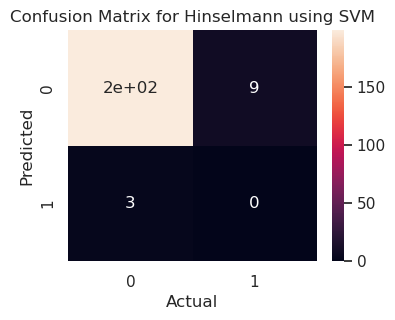

Accuracy: 0.943127962085308
Precision: 0.9159223477943857
Recall: 0.943127962085308
F1 score: 0.9293260894694255
Predicting Hinselmann using SVM


In [24]:
model = 'SVM'
pca = True

SVM_Hinselmann = Classifier(model, target)

pipeline(SVM_Hinselmann, data_list, pca=pca)
# first we train a SVM

print('Predicting', target, 'using', model)

     0  1
0  178  7
1   24  2


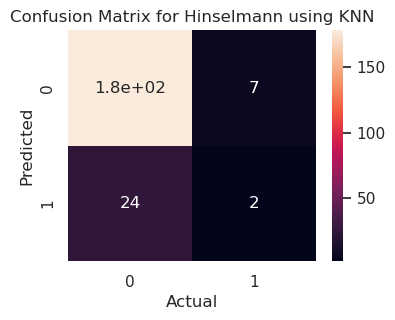

Accuracy: 0.8530805687203792
Precision: 0.9244031490476988
Recall: 0.8530805687203792
F1 score: 0.8855340894578193
Predicting Hinselmann using KNN


In [25]:
model = 'KNN'
pca = True

KNN_Hinselmann = Classifier(model, target)

pipeline(KNN_Hinselmann, data_list, pca=pca)
# then a KNN

print('Predicting', target, 'using', model)

Now moving to the next target variable.

In [26]:
target = 'Schiller'

data_list = list(prepare_data(target, data=data, oversample=True, split_ratio= 0.3))


     0   1
0  182  17
1   11   1


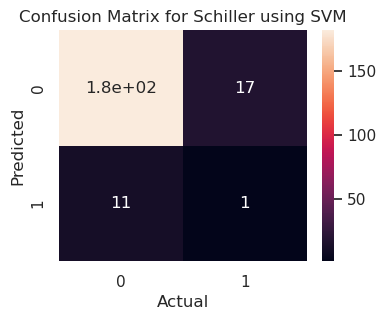

Accuracy: 0.8672985781990521
Precision: 0.8436614351377741
Recall: 0.8672985781990521
F1 score: 0.8550440081245768
Predicting Schiller using SVM


In [27]:
model = 'SVM'
pca = True

SVM_Schiller = Classifier(model, target)

pipeline(SVM_Schiller, data_list, pca=pca)
print('Predicting', target, 'using', model)

     0   1
0  153  11
1   40   7


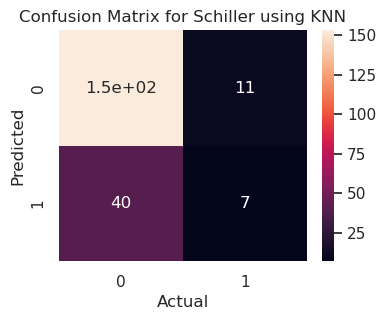

Accuracy: 0.7582938388625592
Precision: 0.8660461095384373
Recall: 0.7582938388625592
F1 score: 0.802395708556846
Predicting Schiller using KNN


In [28]:
model = 'KNN'
pca = True

KNN_Schiller = Classifier(model, target)

pipeline(KNN_Schiller, data_list, pca=pca)
print('Predicting', target, 'using', model)


The next target variable is 'Citology'.
As before, we begin with preparing the data, creating Classifier object and calling pipeline()

In [29]:
target = 'Citology'

data_list = list(prepare_data(target, data=data, oversample=True, split_ratio= 0.3))


     0   1
0  189  10
1   12   0


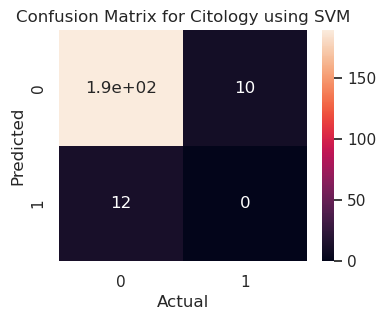

Accuracy: 0.8957345971563981
Precision: 0.9047369549167639
Recall: 0.8957345971563981
F1 score: 0.9002132701421802
Predicting Citology using SVM


In [30]:

model = 'SVM'
pca = True

SVM_Citology = Classifier(model, target)

pipeline(SVM_Citology, data_list, pca=pca)
print('Predicting', target, 'using', model)


     0   1
0  177  10
1   24   0


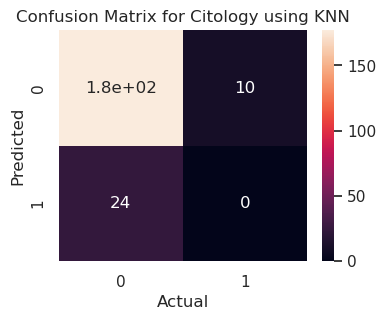

Accuracy: 0.8388625592417062
Precision: 0.901665103783866
Recall: 0.8388625592417062
F1 score: 0.8691307959153759
Predicting Citology using KNN


In [31]:

model = 'KNN'
pca = True

KNN_Citology = Classifier(model, target)

pipeline(KNN_Citology, data_list, pca=pca)
print('Predicting', target, 'using', model)


Finally, the last target variable is 'Biopsy'.

In [32]:
target = 'Biopsy'

data_list = list(prepare_data(target, data=data, oversample=True, split_ratio= 0.3))


     0   1
0  189  14
1    8   0


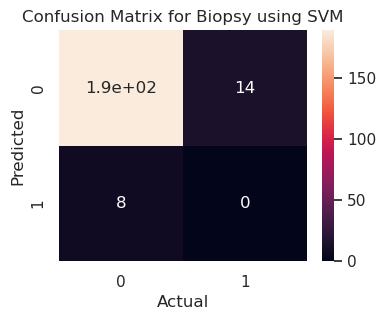

Accuracy: 0.8957345971563981
Precision: 0.8692596829547312
Recall: 0.8957345971563981
F1 score: 0.8822985781990521
Predicting Biopsy using SVM


In [33]:

model = 'SVM'
pca = True

SVM_Biopsy = Classifier(model, target)

pipeline(SVM_Biopsy, data_list, pca=pca)
print('Predicting', target, 'using', model)


     0   1
0  165  11
1   32   3


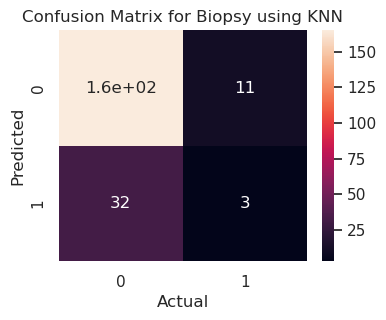

Accuracy: 0.7962085308056872
Precision: 0.8809834123222748
Recall: 0.7962085308056872
F1 score: 0.8341413741716146
Predicting Biopsy using KNN


In [34]:

model = 'KNN'
pca = True

KNN_Biopsy = Classifier(model, target)

pipeline(KNN_Biopsy, data_list, pca=pca)
print('Predicting', target, 'using', model)


Now we tabulate the various evaluation metrics for different Classifiers and Target variables in a single table. 
(metrics for each case)

In [35]:
eval_data = []
eval_data.append(accuracies)
eval_data.append(precisions)
eval_data.append(recalls)
eval_data.append(f1scores)

cols = pd.MultiIndex.from_tuples([('Hinselmann','SVM'),('Hinselmann','KNN'),('Schiller','SVM'),('Schiller','KNN'),('Citology','SVM'),('Citology','KNN'),('Biopsy','SVM'),('Biopsy','KNN')])
results = pd.DataFrame(eval_data, columns=cols, index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

results.head()

Hinselmann            Schiller            Citology            \
                 SVM       KNN       SVM       KNN       SVM       KNN   
Accuracy    0.943128  0.853081  0.867299  0.758294  0.895735  0.838863   
Precision   0.915922  0.924403  0.843661  0.866046  0.904737  0.901665   
Recall      0.943128  0.853081  0.867299  0.758294  0.895735  0.838863   
F1 Score    0.929326  0.885534  0.855044  0.802396  0.900213  0.869131   

             Biopsy            
                SVM       KNN  
Accuracy   0.895735  0.796209  
Precision  0.869260  0.880983  
Recall     0.895735  0.796209  
F1 Score   0.882299  0.834141